Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
import pylab
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error




In [ ]:
data = pd.read_csv("/content/Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [ ]:
print("Dimensions of the dataset  are",data.shape)

Dimensions of the dataset  are (200, 4)


In [ ]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
data[data.duplicated()].any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Data Visulization

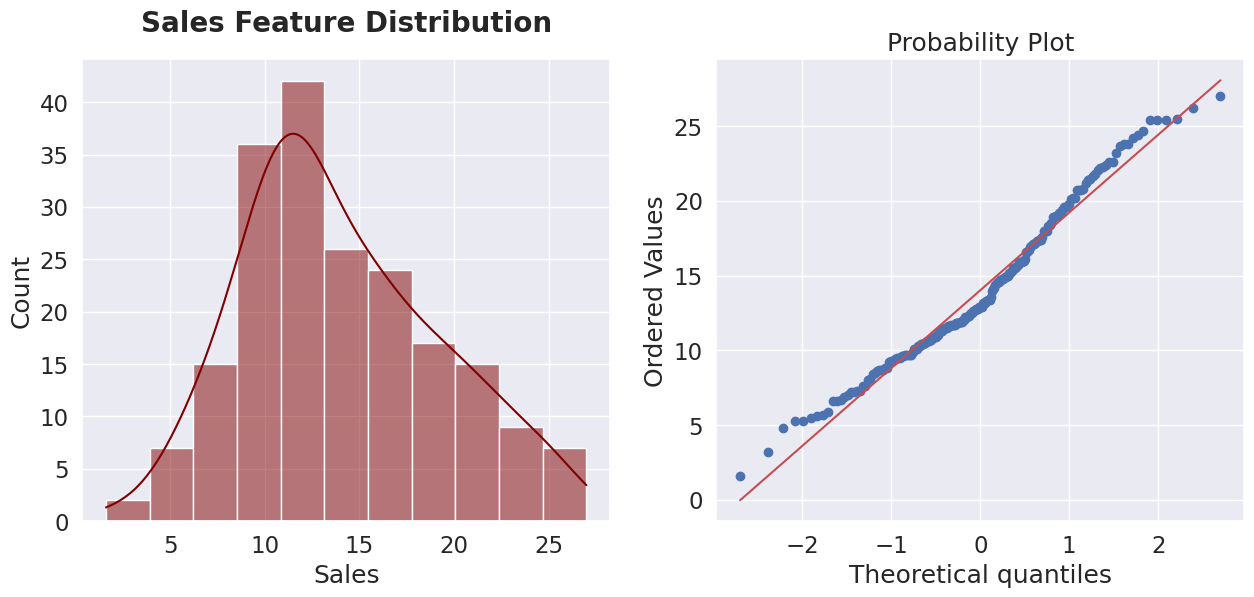

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data["Sales"],color="maroon",kde=True)
plt.title("Sales Feature Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
stats.probplot(data["Sales"],dist="norm",plot=pylab)
plt.show()

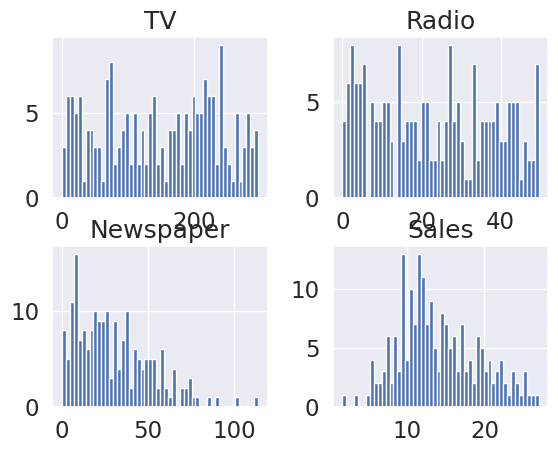

In [ ]:
data.hist(bins=50)
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(data, x="TV", y="Newspaper", color="Sales",
                 size='Radio', hover_data=['Sales'])
fig.show()

In [ ]:
fig = px.scatter(data, x="TV", y="Sales")
fig.show()
fig = px.scatter(data, x="Radio", y="Sales")
fig.show()
fig = px.scatter(data, x="Newspaper", y="Sales")
fig.show()

In [ ]:
fig = px.box(data, y="Sales")
fig.show()
fig = px.box(data["TV"])
fig.show()
fig = px.box(data["Radio"])
fig.show()
fig = px.box(data["Newspaper"])
fig.show()

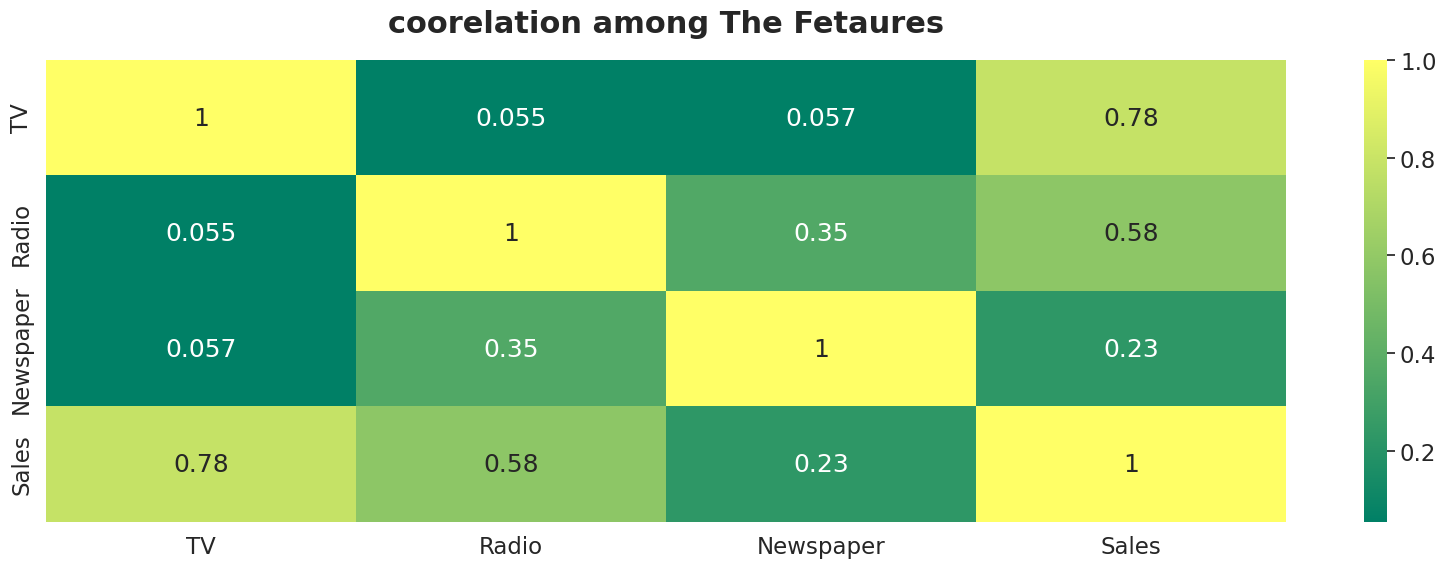

In [ ]:
# checking The correlation of Features.
plt.figure(figsize=(20,6))
sns.heatmap(data.corr(),annot=True,cmap="summer")
plt.title("coorelation among The Fetaures",fontweight="black",fontsize=22,pad=20)
plt.show()

Selecting Label & Target For Model Training

In [ ]:
x = data.drop(columns=["Sales","Newspaper"])
y = data[["Sales"]]

In [ ]:
x.head()

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


Splitting Data For Model training & Testing

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(160, 2) (160, 1)
(40, 2) (40, 1)


Creating Linear Regression Model

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

Model prediction for Training & testing data

In [ ]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

checking Accurracy of Model Prediction

In [ ]:
print("Accuraacy on Training Data is: ",r2_score(y_train,train_pred)*100)
print("Accuraacy on Testing Data is:", r2_score(y_test,test_pred)*100)

Accuraacy on Training Data is:  89.55982149747163
Accuraacy on Testing Data is: 90.05833101920356


In [ ]:
mean_squared_error(y_test,test_pred)

3.137948009068354

In [ ]:
rmse = 0.5**mean_squared_error(y_test,test_pred)
rmse

0.11360135837622067

In [ ]:
mean_absolute_error(y_test,test_pred)

1.4443023138227578

In [ ]:
mean_absolute_percentage_error(y_test,test_pred)

0.15090256196305077

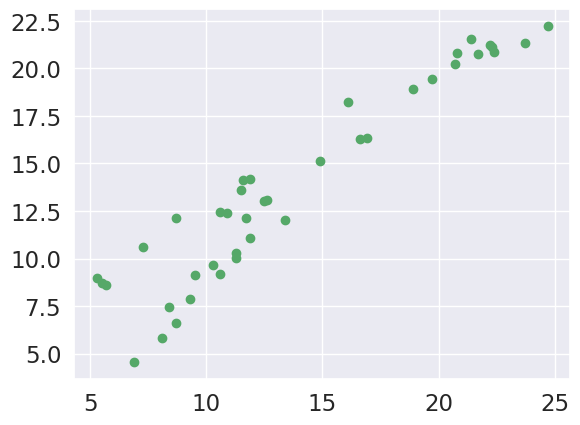

In [ ]:
plt.scatter(y_test,test_pred,c='g')